Import Library

In [1]:
import networkx as nx
import pandas as pd
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from tqdm import trange, tqdm
from tqdm import tqdm_notebook
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import re
import seaborn as sns
import collections
import numpy as np; import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from string import punctuation
from nltk import word_tokenize

Step Preprocess

In [2]:
slangWord = pd.read_csv('Dataset/colloquial-indonesian-lexicon.csv')
replaced = slangWord.iloc[:,1].values.tolist()
slangWord = slangWord.iloc[:,0].values.tolist()
def cleaning(text):
    pat1 = r'@[A-Za-z0-9]+'
    pat2 = r'https?://[A-Za-z0-9./]+'
    pat3 = r'RT '
    pat4 = r'#[A-Za-z0-9]+'
    combined_pat = r'|'.join((pat1, pat2, pat3, pat4))
    clean_text = re.sub(combined_pat, '', text)
    clean_text = re.sub("[^a-zA-Z]", " ", clean_text)
    clean_text = " ".join(clean_text.split())
    result = clean_text.lower()
    return result

def removeStopword(x):
#     return " ".join([w for w in x.split() if not w in dictStopword])
    factory = StopWordRemoverFactory()
    stopword = factory.create_stop_word_remover()
    return stopword.remove(x)

def removeSlang(x):
    temp = [w for w in x if  w in slangWord]
    for item in temp:
        idxSlang = slangWord.index(item)
        idxReplace = x.index(item)
        x[idxReplace] = replaced[idxSlang]
    return x


def cleanAll(x):
    x = cleaning(x)
    x = removeStopword(x)
    x = removeSlang(x.split())
    return " ".join(x)


Load Dataset

In [3]:
dataset = pd.read_csv('Dataset/Dataset Final.csv')
dataset = dataset.drop_duplicates(subset='text', keep='first', inplace=False)
dataset

,screen_name,text
0,rebianca,"Untuk masalah2 pelik, biarlah cewe2 aja yg bah..."
1,sansadhia,"Kalau transit lama dalam perjalanan, ini hal h..."
2,LinlinBanjar,"Angkanya masih terus naik dan mengkhawatirkan,..."
3,meowkiyowo,"@fasyatheboy Cuci tangan, cuci kaki, tidur"
4,Tiyudhs,"• Di rumahnya di Jogja, ternyata Shani punya 1..."
...,...,...
4509,andrewcollien,@Fahrihamzah Karya saya dan teman2 lokal di Ba...
4510,ChannelRedaksi,"Pantau Penyaluran BST, Babinsa Koramil 02/Paro..."
4511,riyandlase,-Apakah saya mendaki Gunung saat pandemi?\r\n\...
4512,Sfc_Ternate,Konser Slank - Rhapsody Indonesia berikutnya a...


Preprocess

In [4]:
for i in trange(len(dataset)):
    dataset['text'].iloc[i] = cleanAll(dataset['text'].loc[i])
dataset.head()

100%|█████████████████████████████████████████████████████████████████████████████| 4514/4514 [00:12<00:00, 373.09it/s]


,screen_name,text
0,rebianca,pelik biarlah cewek saja yang bahas cowok mah ...
1,sansadhia,transit perjalanan diperhatikan ganti masker r...
2,LinlinBanjar,angkanya mengkhawatirkan hati waspada kematian...
3,meowkiyowo,cuci tangan cuci kaki tidur
4,Tiyudhs,rumahnya jogja shani meng re kucing loh sayang...


TF-IDF dan Cosine Similarity

In [5]:
tfidfVect = TfidfVectorizer()
tfidfVect.fit(dataset['text'])
tfidfXTrain = tfidfVect.transform(dataset['text'])
cosineSim = cosine_similarity(tfidfXTrain)

Pembuatan graf berdasarkan kemiripan

In [6]:
G = nx.Graph()
# G.add_nodes_from(dataset.screen_name)
for i in tqdm_notebook(range(len(dataset))):
    idx = np.where(cosineSim[i] > 0.6)
    for insert in idx[0]:
        if dataset.screen_name[i]  != dataset.screen_name[insert]:   
            G.add_edge(dataset.screen_name[i] , dataset.screen_name[insert])

Graf awal

C:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


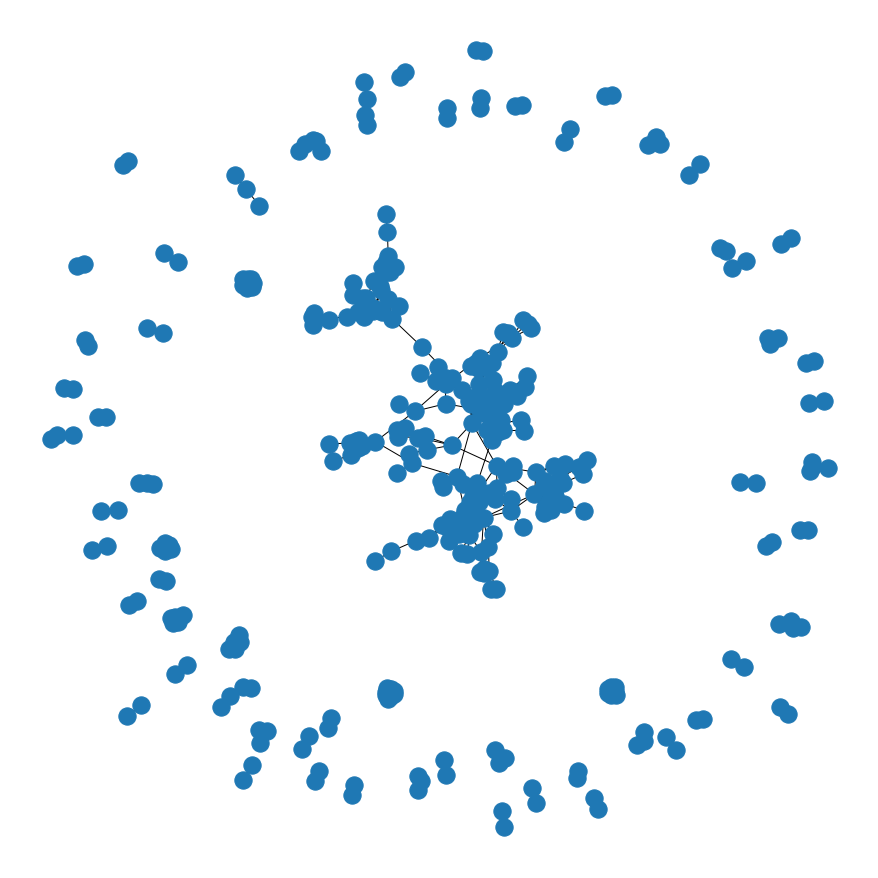

In [7]:
plt.figure(3,figsize=(12,12)) 
nx.draw(G)
plt.show()

Hasil algoritma Louvain

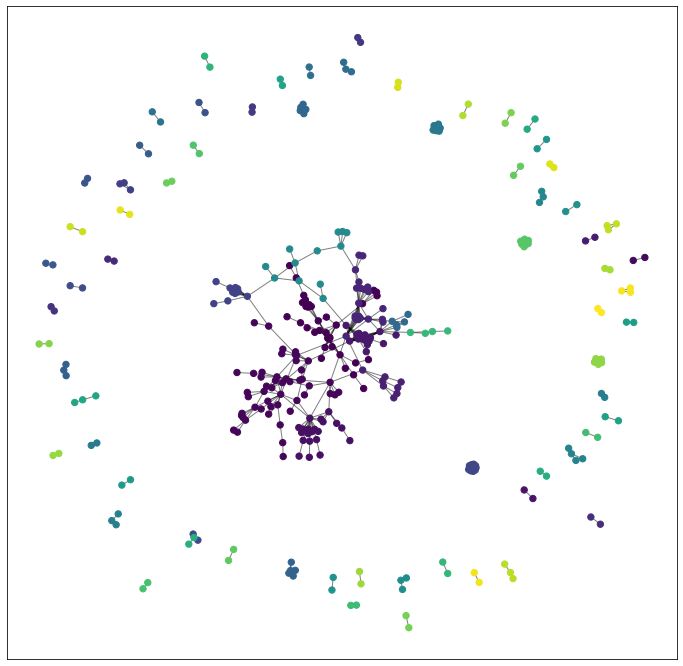

In [8]:
plt.figure(3,figsize=(12,12)) 
partition = community_louvain.best_partition(G)
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)

plt.show()

Daftar komunitas yang terbentuk

364
Counter({1: 50, 0: 34, 5: 22, 8: 22, 3: 21, 36: 12, 15: 11, 16: 11, 7: 8, 56: 8, 30: 7, 24: 5, 25: 5, 26: 5, 63: 5, 34: 4, 51: 4, 14: 3, 23: 3, 27: 3, 33: 3, 35: 3, 37: 3, 45: 3, 68: 3, 69: 3, 75: 3, 2: 2, 4: 2, 6: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 17: 2, 18: 2, 19: 2, 20: 2, 21: 2, 22: 2, 28: 2, 29: 2, 31: 2, 32: 2, 38: 2, 39: 2, 40: 2, 41: 2, 42: 2, 43: 2, 44: 2, 46: 2, 47: 2, 48: 2, 49: 2, 50: 2, 52: 2, 53: 2, 54: 2, 55: 2, 57: 2, 58: 2, 59: 2, 60: 2, 61: 2, 62: 2, 64: 2, 65: 2, 66: 2, 67: 2, 70: 2, 71: 2, 72: 2, 73: 2, 74: 2, 76: 2})


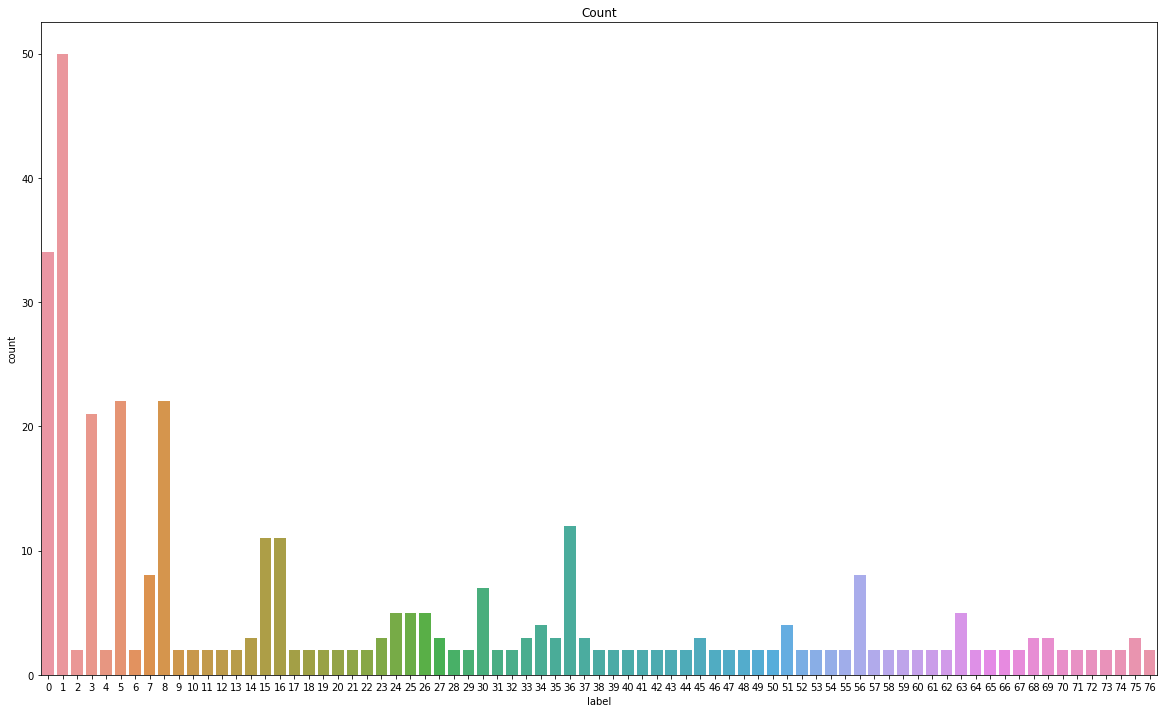

In [9]:
lValue = []
for item, value in partition.items():
    lValue.append(value)
countThis = collections.Counter(lValue)
print(sum(countThis.values()))
print(countThis)


plt.figure(figsize=(20,12))
sns.countplot(lValue)
plt.xlabel('label')
plt.title('Count')
plt.draw()


Contoh Tweet dari salah satu komunitas

In [10]:
listItem = []
for item in partition.keys():
    listItem.append(item)
comm  = list(partition.values())
getThis = [i for i, j in enumerate(comm) if j == 1]
for idx in getThis:
    print(dataset.text[idx])
    print("")

dellaa iya pakai tangan coba kalo habis cuci piring yang panas hati enggak seram

lupa cuci tangan

jalankan protokol kesehatan rumah tidak mendesak masker dengan jaga jarak rumah cuci tangan dengan sabun ingatkan warga

jalankan protokol kesehatan rumah tidak mendesak masker dengan jaga jarak rumah cuci tangan dengan sabun ingatkan warga

jalankan protokol kesehatan rumah tidak mendesak masker dengan jaga jarak rumah cuci tangan dengan sabun ingatkan warga

bima arya kebiasaan pakai masker warga kota bogor tinggi cuci tangan

menangkal serangan covid berdoa bergembira olahraga pakai masker jaga jarak cuci tangan sabun olahraga sepeda gbk senayan jakarta pusat

ngape aneh siiiik cuci tangan bisaaaa

lah memang iya kan mengandung alkohol memakai hs kapan kalo rumah sajo rumah mah cuci tangan saja kebiasaan sebelum pandemic mah hs bersihin paket

tahun momen cuci tangan sekedar mencuci tangan cuci tangan melindungi menyayangi berjuang melawan covid selamat cuci tangan sedunia

oiya lupa 

In [11]:
dfShow = dataset.iloc[getThis]
texts = dfShow['text'].str.lower()
word_counts = collections.Counter(word_tokenize('\n'.join(texts)))
word_counts.most_common()

[('tangan', 61),
 ('cuci', 56),
 ('pakai', 21),
 ('sabun', 17),
 ('rumah', 10),
 ('masker', 10),
 ('jaga', 10),
 ('jarak', 10),
 ('sedunia', 9),
 ('protokol', 8),
 ('dengan', 8),
 ('lupa', 7),
 ('kesehatan', 7),
 ('covid', 7),
 ('memang', 6),
 ('selamat', 6),
 ('pandemi', 6),
 ('kebiasaan', 5),
 ('mencuci', 5),
 ('sehat', 5),
 ('kalo', 4),
 ('yang', 4),
 ('warga', 4),
 ('disiplin', 4),
 ('virus', 4),
 ('oktober', 4),
 ('enggak', 3),
 ('jalankan', 3),
 ('tidak', 3),
 ('mendesak', 3),
 ('ingatkan', 3),
 ('olahraga', 3),
 ('mah', 3),
 ('saja', 3),
 ('air', 3),
 ('teman', 3),
 ('sahabat', 3),
 ('diperingati', 3),
 ('ikuti', 3),
 ('bersih', 3),
 ('indonesia', 3),
 ('sih', 3),
 ('iya', 2),
 ('coba', 2),
 ('habis', 2),
 ('menangkal', 2),
 ('memakai', 2),
 ('hs', 2),
 ('sebelum', 2),
 ('tahun', 2),
 ('kebersihan', 2),
 ('dki', 2),
 ('menempel', 2),
 ('penduduk', 2),
 ('pemerintah', 2),
 ('tundukkan', 2),
 ('penyebaran', 2),
 ('yuk', 2),
 ('tanggal', 2),
 ('ctps', 2),
 ('webinar', 2),
 ('sudah'

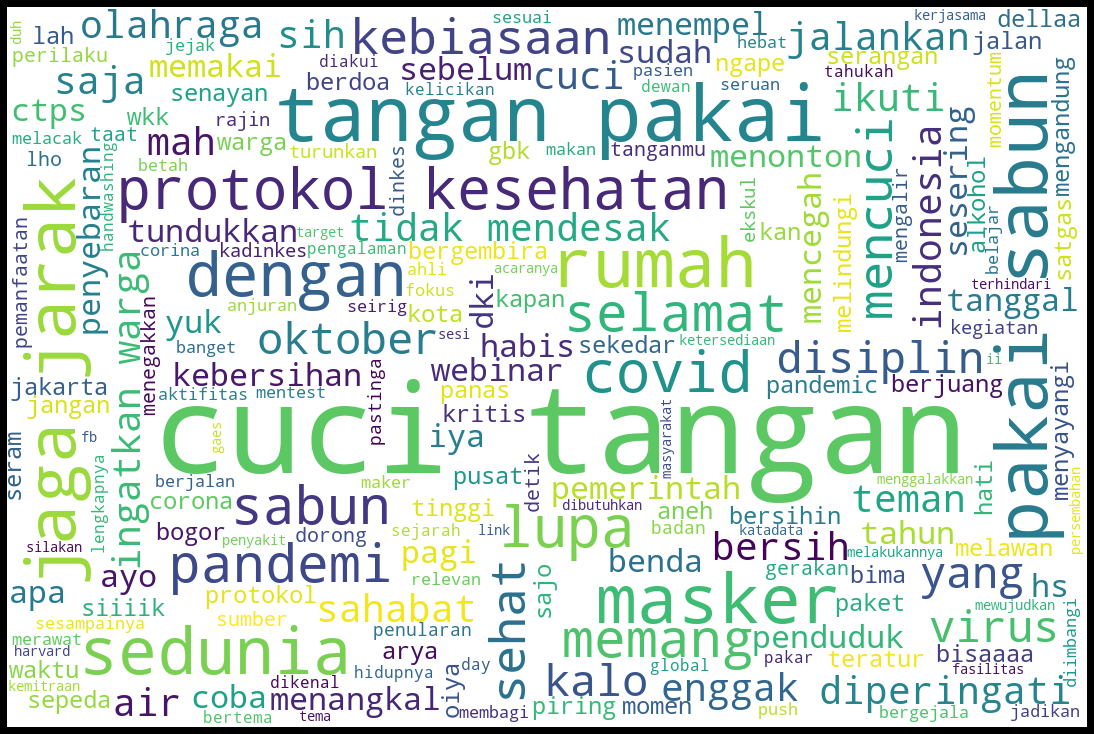

In [12]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator# Start with one review:
wordcloud2 = WordCloud(width=1080, height=720,background_color="white").generate(' '.join(dfShow['text'].str.lower()))

# Display the generated image:
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud2)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()